In [1]:
import pandas as pd
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
df = pd.read_excel('./Grupo 01.xlsx')
#TODO: cuantitativas cosntruir un grafico
#TODO: grafico para cualitativas
#TODO: medidas de tendencia central para precio segun el parqueadero
#TODO: medias de tendencia central para mt2 segun si esta terminaod o no
#TODO: box-plot para las ultimas dos tareas

## Center's Measurement

In [3]:
variables = ['precio','mt2','estrato','alcobas','banos','administracion','avaluo']

var_media = [round(df[i].mean(),2) for i in variables]
var_mediana = [round(df[i].median(),2) for i in variables]
var_mode = [round(df[i].mode(),2) for i in variables]

df_variables = pd.DataFrame(var_media)
df_variables.columns = ['Media']
df_variables['Mediana'] = var_mediana
df_variables['Moda'] = var_mode
df_variables

,Media,Mediana,Moda
0,317.04,245.00,"0 220.0 Name: precio, dtype: float64"
1,120.01,96.00,"0 60.0 Name: mt2, dtype: float64"
2,4.65,5.00,"0 6 Name: estrato, dtype: int64"
3,2.89,3.00,"0 3 Name: alcobas, dtype: int64"
4,2.29,2.00,"0 2 Name: banos, dtype: int64"
5,0.26,0.19,"0 0.0 Name: administracion, dtype: float64"
6,185.33,133.69,0 28.08 1 74.00 2 95.00 3 159.0...


## Scattering's Measurement

In [4]:
var_std = [round(df[i].std(),2) for i in variables]
# var_std
var_min = [df[i].min() for i in variables]
# var_min
var_max = [df[i].max() for i in variables]
# var_max
var_q1 = [round(df[i].quantile(q=0.25),2) for i in variables]
# var_q1
var_q3 = [round(df[i].quantile(q=0.75),2) for i in variables]
# var_q3
var_var = [round(df[i].var(),2) for i in variables]
# var_var
var_asi = [round(df[i].skew(),2) for i in variables]
# var_asi
var_kur = [round(kurtosis(df[i], fisher=False),2) for i in variables]
# var_kur
var_range = [df[i].max() - df[i].min() for i in variables]
# var_range

### Cualitative variable types

In [5]:
def get_acum (dataframe,option):
    """Funcion que llena un arreglo <storaged> con los valores acumulados
       de la suma de cada elemento dentro del <dataframe>
    """
    acum = 0
    storaged = []

    if option == 1: #opcion para obtener la frecuncia absoluta
       values = dataframe['Frecuencia_absoluta'].values

       for i in values:
            acum = acum + i
            storaged.append(acum)

       dataframe['Frec_absoluta_acumulada'] = storaged

    elif option == 2: #opcion para obtener la frecuencia relativa
        values = dataframe['Frecuencia_relativa'].values

        for i in values:
            acum = acum + i
            storaged.append(acum)

        dataframe['Frec_relativa_acumulada'] = storaged

def get_frec_ab (values):
    """Funcion que retorna un dataframe.
       Se obtiene la frec_ab y se conviente en dataframe.
    """
    frec_ab = values.value_counts()
    frec_df = pd.DataFrame(frec_ab)
    frec_df.columns = ['Frecuencia_absoluta']
    return frec_df

def get_frec_rel (dataframe,source):
    """Funcion que actualiza el parametro <datagrame> anadiendo la columna
       de frec_relativas.
    """
    dataframe['Frecuencia_relativa'] = round(dataframe['Frecuencia_absoluta'] * 100 / len(source),3)


In [6]:
var_ubicacion = df['ubicacion']

'''Frecuencia absoluta'''

frec_ubicacion = get_frec_ab(var_ubicacion)

'''Frecuencia relativa'''

get_frec_rel(frec_ubicacion,var_ubicacion)

'''Frecuencia absoluta acumulada'''
get_acum(frec_ubicacion,1)

'''Frecuencia relativa acumulada'''

get_acum(frec_ubicacion,2)

In [7]:
var_balcon = df['balcon']


'''Frecuencia absoluta'''

frec_balcon = get_frec_ab(var_balcon)

'''Frecuencia relativa'''

get_frec_rel(frec_balcon,var_balcon)

'''Frecuencia absoluta acumulada'''
get_acum(frec_balcon,1)

'''Frecuencia relativa acumulada'''
get_acum(frec_balcon,2)


In [8]:
var_parqueadero = df['parqueadero']

'''Frecuencia absoluta'''

frec_parqueadero = get_frec_ab(var_parqueadero)

'''Frecuencia relativa'''

get_frec_rel(frec_parqueadero,var_parqueadero)

'''Frecuencia absoluta acumulada'''
get_acum(frec_parqueadero,1)

'''Frecuencia relativa acumulada'''
get_acum(frec_parqueadero,2)

In [9]:
var_terminado = df['terminado']

'''Frecuencia absoluta'''

frec_terminado = get_frec_ab(var_terminado)

'''Frecuencia relativa'''

get_frec_rel(frec_terminado,var_terminado)

'''Frecuencia absoluta acumulada'''
get_acum(frec_terminado,1)

'''Frecuencia relativa acumulada'''
get_acum(frec_terminado,2)

In [10]:
# var_columna = df['nombre de la columna/variable de mi interes']
#variables_categoricas_disponibles = ['ubicacion','balcon','parqueadero','terminado']

## Price regarding of parqueadero

In [11]:
# sb.barplot(x='parqueadero',y='precio',data=df).set_title("Precios segun si hay parqueo o no")
# plt.axhline(df['precio'].mean(), color ="r", linestyle = '--', linewidth = 5)
# plt.axhline(df['precio'].median(), color ="g", linestyle = '--', linewidth = 5)
# plt.axhline(df['precio'].mode().values, color ="y", linestyle = 'dashdot', linewidth = 5)

<AxesSubplot:xlabel='precio', ylabel='parqueadero'>

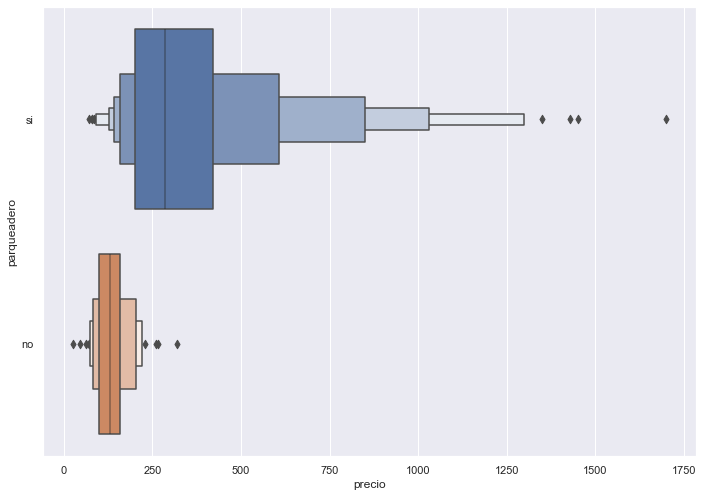

In [12]:
# yes_median = df[(df['parqueadero'] == 'si')]['precio'].median()
# yes_media = df[(df['parqueadero'] == 'si')]['precio'].media()
# yes_mode = df[(df['parqueadero'] == 'si')]['precio'].mode()
# no_median = df[(df['parqueadero'] == 'no')]['precio'].median()
# no_media = df[(df['parqueadero'] == 'no')]['precio'].media()
# no_mode = df[(df['parqueadero'] == 'no')]['precio'].mode()

sb.boxenplot(x='precio',y='parqueadero',data=df)

## Mt2 regarding of terminado

In [13]:
# sb.barplot(x='terminado',y='mt2',data=df).set_title("mt2 segun estado de activo inmueble")
# plt.axhline(df['mt2'].mean(), color ="r", linestyle = '--', linewidth = 5)
# plt.axhline(df['mt2'].median(), color ="g", linestyle = '--', linewidth = 5)
# plt.axhline(df['mt2'].mode().values, color ="y", linestyle = 'dashdot', linewidth = 5)

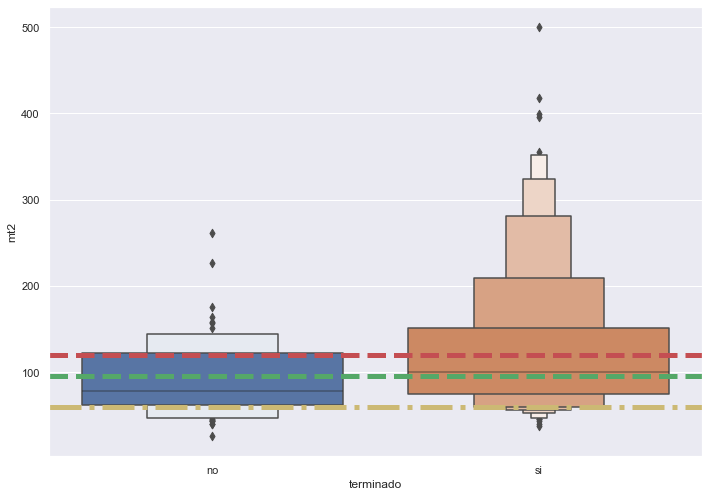

In [14]:
sb.boxenplot(x='terminado',y='mt2',data=df)
plt.axhline(df['mt2'].mean(), color ="r", linestyle = '--', linewidth = 5)
plt.axhline(df['mt2'].median(), color ="g", linestyle = '--', linewidth = 5)
plt.axhline(df['mt2'].mode().values, color ="y", linestyle = 'dashdot', linewidth = 5)

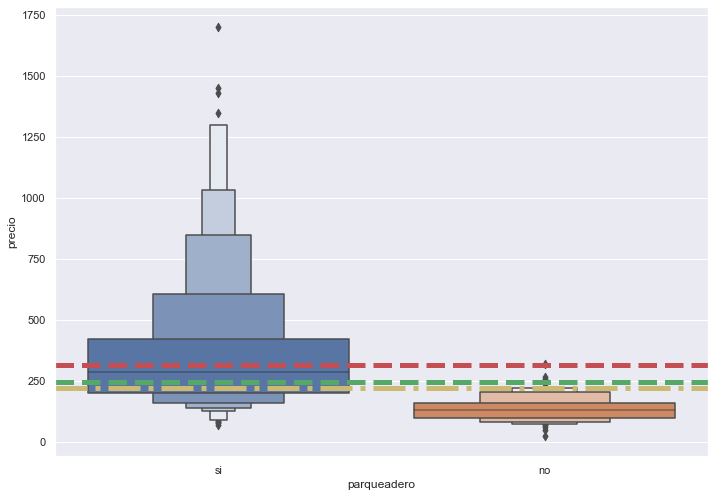

In [15]:
sb.boxenplot(x='parqueadero',y='precio',data=df)
plt.axhline(df['precio'].mean(), color ="r", linestyle = '--', linewidth = 5)
plt.axhline(df['precio'].median(), color ="g", linestyle = '--', linewidth = 5)
plt.axhline(df['precio'].mode().values, color ="y", linestyle = 'dashdot', linewidth = 5)
